In [1]:
import yfinance as yf
import os
import pandas as pd

Historical price data for the XRP cryptocurrency

In [2]:
xrp_ticker = yf.Ticker("XRP-USD")

In [3]:
xrp = xrp_ticker.history(period = "max")

In [4]:
xrp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,0.217911,0.221791,0.214866,0.217488,147916992,0.0,0.0
2017-11-10 00:00:00+00:00,0.218256,0.219068,0.205260,0.206483,141032992,0.0,0.0
2017-11-11 00:00:00+00:00,0.205948,0.214456,0.205459,0.210430,134503008,0.0,0.0
2017-11-12 00:00:00+00:00,0.210214,0.210214,0.195389,0.197339,251175008,0.0,0.0
2017-11-13 00:00:00+00:00,0.197472,0.204081,0.197456,0.203442,132567000,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-23 00:00:00+00:00,0.610948,0.632407,0.605780,0.617596,1160450696,0.0,0.0
2024-03-24 00:00:00+00:00,0.617608,0.635601,0.614912,0.632950,1230486578,0.0,0.0
2024-03-25 00:00:00+00:00,0.632953,0.659296,0.627339,0.641034,2044948880,0.0,0.0


In [5]:
xrp.index = pd.to_datetime(xrp.index)

In [6]:
del xrp["Dividends"]
del xrp["Stock Splits"]

Line chart of the closing prices of XRP

<Axes: xlabel='Date'>

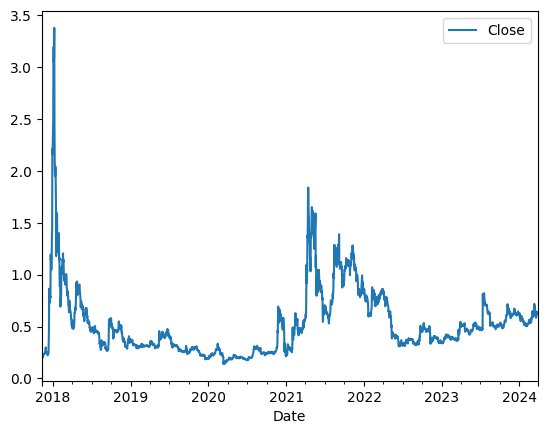

In [7]:
xrp.plot.line(y = "Close", use_index = True)

In [8]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

Merging historical data of XRP with Wikipedia

In [22]:
xrp.index = xrp.index.tz_localize(None)
wiki.index = wiki.index.tz_localize(None)

In [23]:
xrp = xrp.merge(wiki, left_index=True, right_index=True)

In [24]:
xrp

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment
2017-12-08,0.223636,0.278673,0.222168,0.252125,660172032,0.033333,0.033306,0.0
2017-12-09,0.252162,0.255684,0.240073,0.244708,205288992,0.033333,0.033306,0.0
2017-12-10,0.245548,0.245548,0.229304,0.237333,198174000,0.033333,0.033306,0.0
2017-12-11,0.236574,0.252777,0.235804,0.251691,176100992,0.033333,0.033306,0.0
2017-12-12,0.252258,0.434102,0.250961,0.373541,1555040000,0.033333,0.033306,0.0
...,...,...,...,...,...,...,...,...
2024-03-23,0.610948,0.632407,0.605780,0.617596,1160450696,0.000000,0.000000,0.0
2024-03-24,0.617608,0.635601,0.614912,0.632950,1230486578,0.000000,0.000000,0.0
2024-03-25,0.632953,0.659296,0.627339,0.641034,2044948880,0.000000,0.000000,0.0
2024-03-26,0.641034,0.652814,0.627026,0.632253,1799059517,0.000000,0.000000,0.0


Creating a new column named "tomorrow" in the xrp DataFrame

In [25]:
xrp["tomorrow"] = xrp["Close"].shift(-1)

In [26]:
xrp

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment,tomorrow
2017-12-08,0.223636,0.278673,0.222168,0.252125,660172032,0.033333,0.033306,0.0,0.244708
2017-12-09,0.252162,0.255684,0.240073,0.244708,205288992,0.033333,0.033306,0.0,0.237333
2017-12-10,0.245548,0.245548,0.229304,0.237333,198174000,0.033333,0.033306,0.0,0.251691
2017-12-11,0.236574,0.252777,0.235804,0.251691,176100992,0.033333,0.033306,0.0,0.373541
2017-12-12,0.252258,0.434102,0.250961,0.373541,1555040000,0.033333,0.033306,0.0,0.471063
...,...,...,...,...,...,...,...,...,...
2024-03-23,0.610948,0.632407,0.605780,0.617596,1160450696,0.000000,0.000000,0.0,0.632950
2024-03-24,0.617608,0.635601,0.614912,0.632950,1230486578,0.000000,0.000000,0.0,0.641034
2024-03-25,0.632953,0.659296,0.627339,0.641034,2044948880,0.000000,0.000000,0.0,0.632253
2024-03-26,0.641034,0.652814,0.627026,0.632253,1799059517,0.000000,0.000000,0.0,0.621728


Indicat whether the closing price of XRP increased (1) or not (0) the next day

In [27]:
xrp["target"] = (xrp["tomorrow"] > xrp["Close"]).astype(int)

1 indicating an increase in the closing price of XRP the next day. 0 indicating no increase in the closing price of XRP the next day

In [28]:
xrp["target"].value_counts()

target
0    1170
1    1132
Name: count, dtype: int64

Training the model

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier
# with specified parameters for the number of estimators,
# minimum samples required to split an internal node, and random state
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

# Split the DataFrame 'xrp' into training and testing sets
# Training set contains all rows except the last 200
# Testing set contains the last 200 rows
train = xrp.iloc[:-200]
test = xrp.iloc[-200:]

# Define the features (predictors) used for training the model
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Train the model using the training data
# Features: train[predictors]
# Target variable: train["target"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

Precision score

In [31]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test['target'], preds)

0.6229508196721312

This function allows for easy prediction using a pre-trained model on new data and enables comparison between the actual and predicted values

In [32]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='predictions')
    combined = pd.concat([test['target'], preds], axis=1)
    return combined

Backtest on a given dataset

In [33]:
def backtest(data, model, predictors, start=1095, step= 150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [34]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=0.1, n_estimators=200)
predictions = backtest(xrp, model, predictors)

In [35]:
precision_score(predictions["target"], predictions["predictions"])

0.5196261682242991

Function computes rolling averages and trends for various horizons (2 days, 7 days, 60 days, and 365 days) based on the "Close" price of the XRP cryptocurrency. Additionally, it calculates ratios of the "Close" price to the rolling averages for each horizon

In [36]:
def compute_rolling(xrp):
    horizons = [2, 7, 60, 365]
    new_predictions = ["Close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = xrp.rolling(horizon, min_periods=1).mean()

        ratio_column = f"Close_ratio_{horizon}"
        xrp[ratio_column] = xrp["Close"] / rolling_averages["Close"]

        edit_column = f"Close_edit_{horizon}"
        xrp[edit_column] = rolling_averages["Close"]

        rolling = xrp.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        xrp[trend_column] = rolling["Close"]

        new_predictions += [ratio_column, trend_column, edit_column]
    return xrp, new_predictions

In [37]:
xrp, new_predictons = compute_rolling(xrp.copy())

In [38]:
xrp

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,Close_ratio_7,Close_edit_7,trend_7,Close_ratio_60,Close_edit_60,trend_60,Close_ratio_365,Close_edit_365,trend_365
2017-12-08,0.223636,0.278673,0.222168,0.252125,660172032,0.033333,0.033306,0.0,0.244708,0,...,NaN,1.000000,0.252125,NaN,1.000000,0.252125,NaN,1.000000,0.252125,NaN
2017-12-09,0.252162,0.255684,0.240073,0.244708,205288992,0.033333,0.033306,0.0,0.237333,0,...,0.252125,0.985071,0.248416,0.252125,0.985071,0.248416,0.252125,0.985071,0.248416,0.252125
2017-12-10,0.245548,0.245548,0.229304,0.237333,198174000,0.033333,0.033306,0.0,0.251691,1,...,0.248416,0.969807,0.244722,0.248416,0.969807,0.244722,0.248416,0.969807,0.244722,0.248416
2017-12-11,0.236574,0.252777,0.235804,0.251691,176100992,0.033333,0.033306,0.0,0.373541,1,...,0.241021,1.021207,0.246464,0.244722,1.021207,0.246464,0.244722,1.021207,0.246464,0.244722
2017-12-12,0.252258,0.434102,0.250961,0.373541,1555040000,0.033333,0.033306,0.0,0.471063,1,...,0.244512,1.373921,0.271880,0.246464,1.373921,0.271880,0.246464,1.373921,0.271880,0.246464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-23,0.610948,0.632407,0.605780,0.617596,1160450696,0.000000,0.000000,0.0,0.632950,1,...,0.625820,0.997816,0.618948,0.616871,1.079241,0.572250,0.570586,1.112583,0.555101,0.554576
2024-03-24,0.617608,0.635601,0.614912,0.632950,1230486578,0.000000,0.000000,0.0,0.641034,1,...,0.614272,1.019395,0.620908,0.618948,1.102381,0.574166,0.572250,1.139185,0.555617,0.555101
2024-03-25,0.632953,0.659296,0.627339,0.641034,2044948880,0.000000,0.000000,0.0,0.632253,0,...,0.625273,1.033968,0.619975,0.620908,1.112346,0.576290,0.574166,1.152642,0.556143,0.555617
2024-03-26,0.641034,0.652814,0.627026,0.632253,1799059517,0.000000,0.000000,0.0,0.621728,0,...,0.636992,1.008692,0.626805,0.619975,1.093943,0.577958,0.576290,1.136000,0.556561,0.556143


In [39]:
predictions = backtest(xrp, model, new_predictons)

In [42]:
precision_score(predictions["target"], predictions["predictions"])

0.5112936344969199

In [43]:
predictions

,target,predictions
2020-12-07,0,1
2020-12-08,1,1
2020-12-09,0,1
2020-12-10,0,1
2020-12-11,0,1
...,...,...
2024-03-23,1,1
2024-03-24,1,0
2024-03-25,0,0
2024-03-26,0,0
